In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')

In [20]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

In [21]:
cat4.shape

(375, 500, 3)

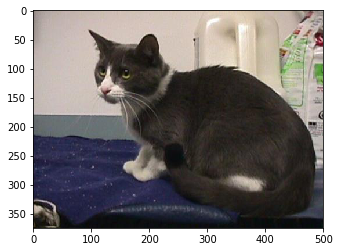

In [8]:
plt.imshow(cat4)

In [30]:
dog = cv2.imread('../DATA/CATS_DOGS/train/DOG/2.jpg')

In [31]:
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

In [32]:
dog.shape

(199, 188, 3)

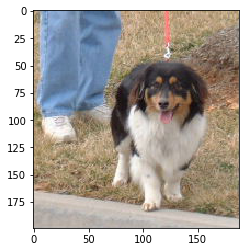

In [33]:
plt.imshow(dog)

In [34]:
from keras.preprocessing.image import ImageDataGenerator

In [44]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [45]:
image_gen.random_transform(dog)
print('suppressed')

suppressed


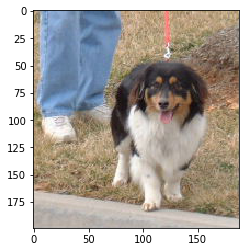

In [46]:
plt.imshow(dog)

In [50]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [51]:
input_shape = (150,150,3)

In [54]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [55]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [58]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/train',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [59]:
test_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/test',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [60]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [64]:
results = model.fit_generator(train_image_gen, epochs=1, steps_per_epoch=100,
                             validation_data=test_image_gen, validation_steps=12)

Epoch 1/1
 11/100 [==>...........................] - ETA: 26s - loss: 0.6914 - acc: 0.5000

F:\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
F:\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
F:\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
F:\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
F:\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWar

 37/100 [==========>...................] - ETA: 16s - loss: 0.6888 - acc: 0.5473

F:\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
F:\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
F:\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 116s 1s/step - loss: 0.6875 - acc: 0.5662 - val_loss: 0.6799 - val_acc: 0.5665


In [71]:
results.history['acc']

[0.56625]

In [65]:
import numpy as np
from keras.preprocessing import image

dog_file = '../DATA/CATS_DOGS/train/DOG/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [67]:
prediction_prob = model.predict(dog_img)

In [69]:
print(f'Probability that image is a dog is: {prediction_prob}')

Probability that image is a dog is: [[0.52824616]]
